# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 634


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url).json()

        
        # Append the City information into city_data list
        city_data.append({"City": city_weather['name'], 
                          "Lat": city_weather['coord']['lat'], 
                          "Lng": city_weather['coord']['lon'], 
                          "Max Temp": city_weather['main']['temp_max'],
                          "Humidity": city_weather['main']['humidity'],
                          "Cloudiness": city_weather['clouds']['all'],
                          "Wind Speed": city_weather['wind']['speed'],
                          "Country": city_weather['sys']['country'],
                          "Date": city_weather['dt']})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | haren
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | bilibino
Processing Record 6 of Set 1 | alice springs
Processing Record 7 of Set 1 | alofi
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | phalaborwa
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | isafjordur
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | tamanrasset
Processing Record 14 of Set 1 | al kharijah
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | pacific grove
Processing Record 17 of Set 1 | cuyo
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | broken hill
Processing Record 20 of Set 1 | stanley
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | bochum
Processing Rec

Processing Record 41 of Set 4 | hithadhoo
Processing Record 42 of Set 4 | mwinilunga
Processing Record 43 of Set 4 | olonkinbyen
Processing Record 44 of Set 4 | scarborough
Processing Record 45 of Set 4 | shiguai
Processing Record 46 of Set 4 | port alfred
Processing Record 47 of Set 4 | malpe
Processing Record 48 of Set 4 | palangkaraya
Processing Record 49 of Set 4 | santiago del estero
Processing Record 0 of Set 5 | siem reap
Processing Record 1 of Set 5 | ingeniero jacobacci
Processing Record 2 of Set 5 | qaqortoq
Processing Record 3 of Set 5 | smithers
Processing Record 4 of Set 5 | san julian
Processing Record 5 of Set 5 | kavaratti
Processing Record 6 of Set 5 | laojunmiao
Processing Record 7 of Set 5 | toro
Processing Record 8 of Set 5 | benguela
Processing Record 9 of Set 5 | china
Processing Record 10 of Set 5 | vernon
Processing Record 11 of Set 5 | nadym
Processing Record 12 of Set 5 | vilyuysk
Processing Record 13 of Set 5 | gereida
Processing Record 14 of Set 5 | puerto a

Processing Record 33 of Set 8 | opuwo
Processing Record 34 of Set 8 | tsiombe
Processing Record 35 of Set 8 | yeppoon
Processing Record 36 of Set 8 | halifax
Processing Record 37 of Set 8 | bima
Processing Record 38 of Set 8 | puerto wilches
Processing Record 39 of Set 8 | umba
Processing Record 40 of Set 8 | labrador city
Processing Record 41 of Set 8 | thiruvidaimaruthur
Processing Record 42 of Set 8 | ha'il
Processing Record 43 of Set 8 | bubaque
Processing Record 44 of Set 8 | tobetsu
Processing Record 45 of Set 8 | gaiman
Processing Record 46 of Set 8 | kasongo-lunda
Processing Record 47 of Set 8 | manokwari
Processing Record 48 of Set 8 | chokwe
Processing Record 49 of Set 8 | nyagan
Processing Record 0 of Set 9 | murrells inlet
Processing Record 1 of Set 9 | kyzyl-mazhalyk
Processing Record 2 of Set 9 | remire-montjoly
Processing Record 3 of Set 9 | champerico
Processing Record 4 of Set 9 | coyhaique
Processing Record 5 of Set 9 | katghora
Processing Record 6 of Set 9 | unionvil

Processing Record 22 of Set 12 | berdigestyakh
Processing Record 23 of Set 12 | macae
Processing Record 24 of Set 12 | fuyu
Processing Record 25 of Set 12 | susaki
Processing Record 26 of Set 12 | yigo village
Processing Record 27 of Set 12 | korsakov
Processing Record 28 of Set 12 | talakan
Processing Record 29 of Set 12 | worcester
Processing Record 30 of Set 12 | morehead city
Processing Record 31 of Set 12 | farmville
Processing Record 32 of Set 12 | gizo
Processing Record 33 of Set 12 | kuanda
Processing Record 34 of Set 12 | nouadhibou
Processing Record 35 of Set 12 | sao gabriel da cachoeira
Processing Record 36 of Set 12 | chudovo
Processing Record 37 of Set 12 | vallenar
Processing Record 38 of Set 12 | touros
Processing Record 39 of Set 12 | tionk essil
Processing Record 40 of Set 12 | artigas
Processing Record 41 of Set 12 | dali
Processing Record 42 of Set 12 | kaoma
Processing Record 43 of Set 12 | alvinopolis
Processing Record 44 of Set 12 | mili
Processing Record 45 of S

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          615
Lat           615
Lng           615
Max Temp      615
Humidity      615
Cloudiness    615
Wind Speed    615
Country       615
Date          615
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,61.32,33,40,6.91,CA,1683751534
1,Haren,52.7833,7.2333,57.34,94,100,0.00,DE,1683751535
2,Port-aux-Français,-49.3500,70.2167,44.40,93,84,25.66,TF,1683751447
3,Bethel,41.3712,-73.4140,74.01,30,0,6.91,US,1683751536
4,Bilibino,68.0546,166.4372,32.20,85,100,5.12,RU,1683751477


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Yellowknife,62.4560,-114.3525,61.32,33,40,6.91,CA,1683751534
1,Haren,52.7833,7.2333,57.34,94,100,0.00,DE,1683751535
2,Port-aux-Français,-49.3500,70.2167,44.40,93,84,25.66,TF,1683751447
3,Bethel,41.3712,-73.4140,74.01,30,0,6.91,US,1683751536
4,Bilibino,68.0546,166.4372,32.20,85,100,5.12,RU,1683751477


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

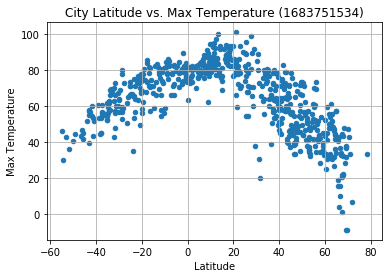

In [9]:
# Build scatter plot for latitude vs. temperature
date = city_data_df["Date"][0]

city_data_df.plot.scatter(["Lat"], ["Max Temp"])

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature ({date})')

plt.xlabel("Latitude")

plt.ylabel("Max Temperature")

plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")      

# Show plot
plt.show()

#### Latitude Vs. Humidity

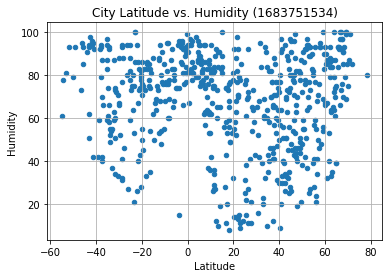

In [10]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(["Lat"], ["Humidity"])


# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ({date})')

plt.xlabel("Latitude")

plt.ylabel("Humidity")

plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

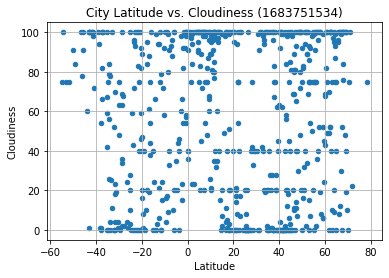

In [11]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(["Lat"], ["Cloudiness"])


# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({date})')

plt.xlabel("Latitude")

plt.ylabel("Cloudiness")

plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

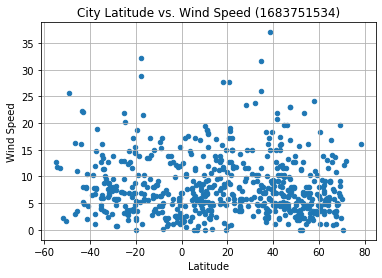

In [12]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(["Lat"], ["Wind Speed"])


# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ({date})')

plt.xlabel("Latitude")

plt.ylabel("Wind Speed")

plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
def lineR(x,y):
    (slope, intercept, rvalue, pvalue, stderr ) = linregress(x, y)
    print(f"The r-value is: {rvalue}")
    plt.figure(figsize=[15,6])
    plt.scatter(x,y)
    #y=x(slope)+(intercept)
    lvalue = x*slope + intercept 
    plt.plot(x,lvalue, color="red",linewidth=3)
    plt.annotate(f"y={slope}*x + {intercept}",(-40,30), color="red", fontsize=10)

The r-value is: -0.05974465184509312


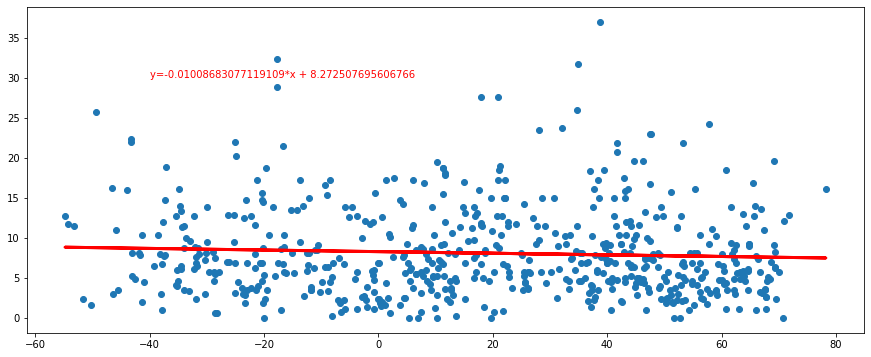

In [14]:
lineR(city_data_df["Lat"], city_data_df["Wind Speed"])

LinregressResult(slope=0.0018655573703965855, intercept=8.381860839910194, rvalue=0.010784067229464638, pvalue=0.7970748614488906, stderr=0.007251780237439753)

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Yellowknife,62.4560,-114.3525,61.32,33,40,6.91,CA,1683751534
1,Haren,52.7833,7.2333,57.34,94,100,0.00,DE,1683751535
3,Bethel,41.3712,-73.4140,74.01,30,0,6.91,US,1683751536
4,Bilibino,68.0546,166.4372,32.20,85,100,5.12,RU,1683751477
9,Tiksi,71.6872,128.8694,6.89,85,22,12.88,RU,1683751542


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0,:]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,Port-aux-Français,-49.3500,70.2167,44.40,93,84,25.66,TF,1683751447
5,Alice Springs,-23.7000,133.8833,35.15,80,0,3.00,AU,1683751463
6,Alofi,-19.0595,-169.9187,80.49,83,40,10.36,NU,1683751542
7,Puerto Natales,-51.7236,-72.4875,36.05,93,75,2.30,CL,1683751542
8,Phalaborwa,-23.9430,31.1411,65.48,64,43,3.71,ZA,1683751542


###  Temperature vs. Latitude Linear Regression Plot

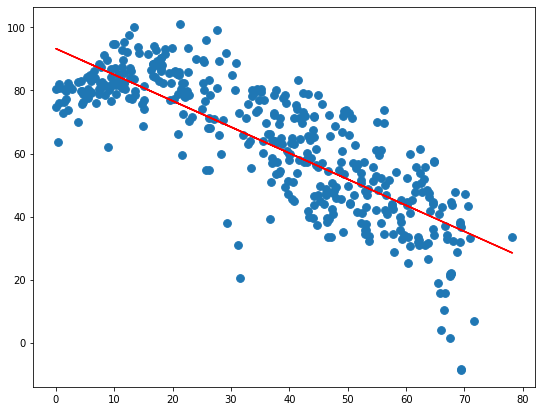

In [23]:
# Linear regression on Northern Hemisphere
def lR(a,b,c,d,e,f):
    

    plt.figure(figsize=(9,7))
    plt.scatter(a,b,s=60)
    (slope, intercept, r, p, stderr) = linregress(a,b)
    line = slope*a + intercept
    plt.plot(a,line,"r-")
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(e,f),color="red",size=22)

    
a = northern_hemi_df["Lat"]
b = northern_hemi_df["Max Temp"]
c = "Latitude"
d = "Max Temp"
e = 0
f = -20

lR(a,b,c,d,e,f)


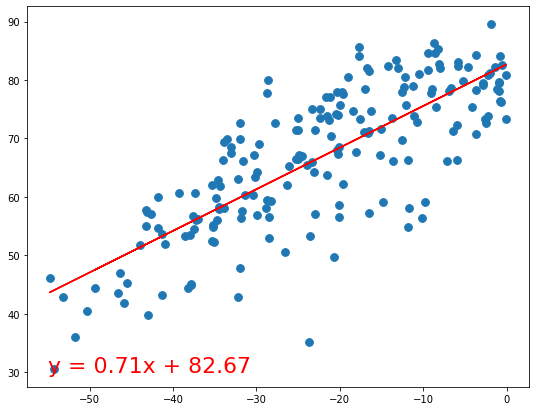

In [24]:
# Linear regression on Southern Hemisphere

a = southern_hemi_df["Lat"]
b = southern_hemi_df["Max Temp"]
c = "Latitude"
d = "Max Temp"
e = -55
f = 30

lR(a,b,c,d,e,f)

**Discussion about the linear relationship: 

### Humidity vs. Latitude Linear Regression Plot

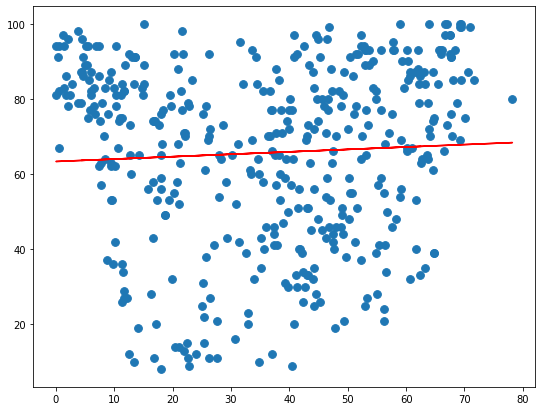

In [25]:
# Northern Hemisphere
a = northern_hemi_df["Lat"]
b = northern_hemi_df["Humidity"]
c = "Latitude"
d = "Humidity"
e = 45
f = 3

lR(a,b,c,d,e,f)

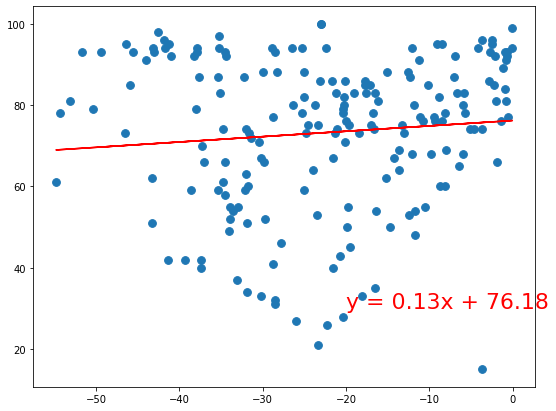

In [26]:
# Southern Hemisphere
a = southern_hemi_df["Lat"]
b = southern_hemi_df["Humidity"]
c = "Latitude"
d = "Humidity"
e = -20
f = 30

lR(a,b,c,d,e,f)

**Discussion about the linear relationship: 

The coefficients for determination for both humidity and latitude plots are very near to zero. From my understanding, this can mean that the regression model is not reliable for predicting humidity when latitude is another factor. 

### Cloudiness vs. Latitude Linear Regression Plot

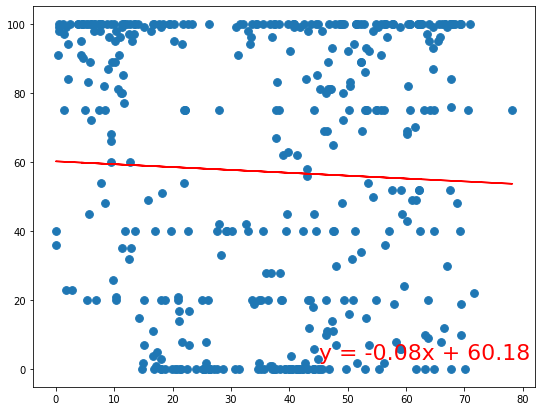

In [27]:
# Northern Hemisphere

a = northern_hemi_df["Lat"]
b = northern_hemi_df["Cloudiness"]
c = "Latitude"
d = "Cloudiness"
e = 45
f = 3

lR(a,b,c,d,e,f)

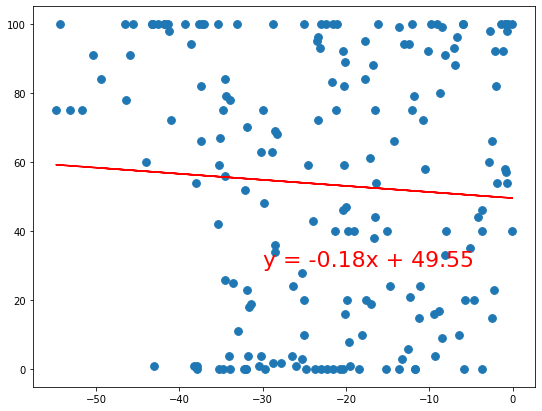

In [28]:
# Southern Hemisphere

a = southern_hemi_df["Lat"]
b = southern_hemi_df["Cloudiness"]
c = "Latitude"
d = "Cloudiness"
e = -30
f = 30

lR(a,b,c,d,e,f)

**Discussion about the linear relationship:** 
The coefficients for determination for both cloudiness and latitude plots are slightly negative. There is a small linear regression when it comes to these two factors. 

### Wind Speed vs. Latitude Linear Regression Plot

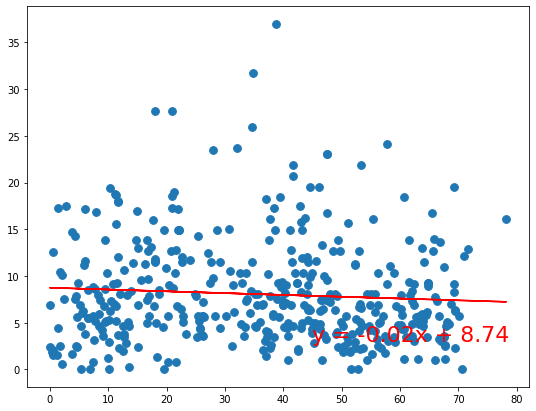

In [29]:
# Northern Hemisphere
a = northern_hemi_df["Lat"]
b = northern_hemi_df["Wind Speed"]
c = "Latitude"
d = "Wind Speed"
e = 45
f = 3

lR(a,b,c,d,e,f)

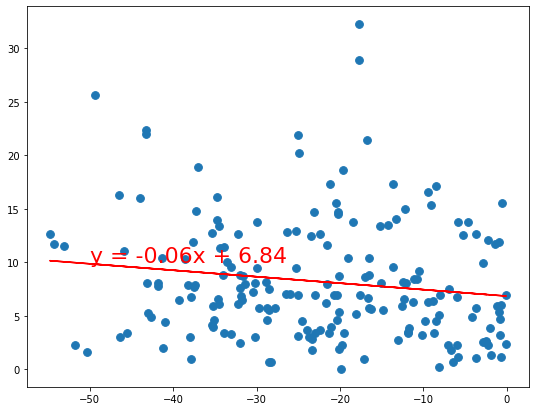

In [31]:
# Southern Hemisphere

a = southern_hemi_df["Lat"]
b = southern_hemi_df["Wind Speed"]
c = "Latitude"
d = "Wind Speed"
e = -50
f = 10

lR(a,b,c,d,e,f)

**Discussion about the linear relationship: From these two plots we see little to none negative regression. 